In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [81]:
df = pd.read_csv('./Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [82]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre score          400 non-null    int64  
 1   toefl score        400 non-null    int64  
 2   university rating  400 non-null    int64  
 3   sop                400 non-null    float64
 4   lor                400 non-null    float64
 5   cgpa               400 non-null    float64
 6   research           400 non-null    int64  
 7   chance of admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [108]:
df.isnull().sum()

gre score            0
toefl score          0
university rating    0
sop                  0
lor                  0
cgpa                 0
research             0
chance of admit      0
dtype: int64

In [84]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
# df = df.drop(['serial no.'], axis=1) #Serial No. has no impact on the target variable
df.columns

Index(['serial no.', 'gre score', 'toefl score', 'university rating', 'sop',
       'lor', 'cgpa', 'research', 'chance of admit'],
      dtype='object')

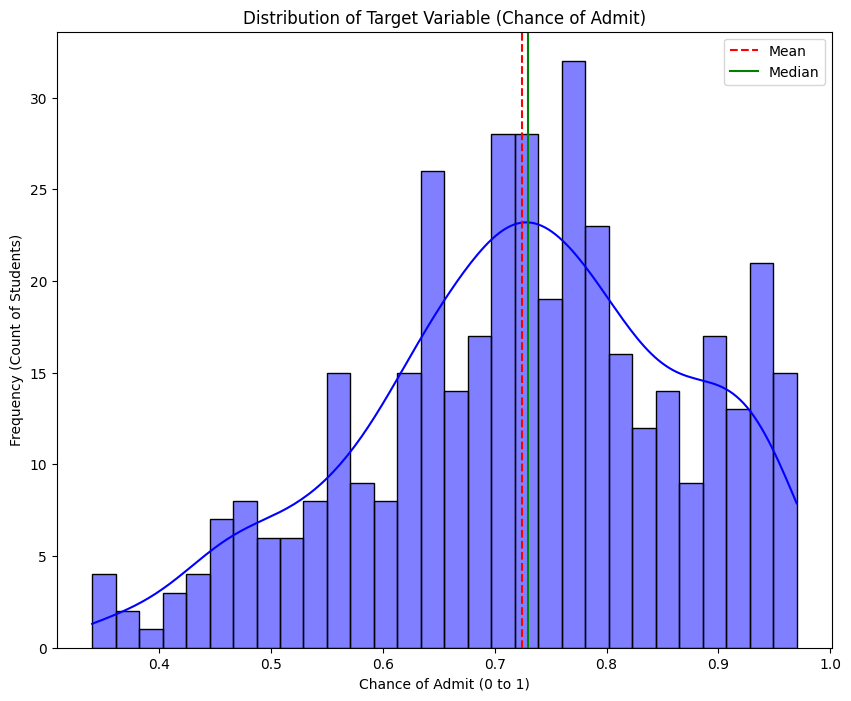

In [85]:
plt.figure(figsize=(10,8))
sns.histplot(df['chance of admit'], kde=True, bins=30, color='blue')
plt.title('Distribution of Target Variable (Chance of Admit)')
plt.xlabel('Chance of Admit (0 to 1)')
plt.ylabel('Frequency (Count of Students)')
plt.axvline(df['chance of admit'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['chance of admit'].median(), color='green', linestyle='-', label='Median')
plt.legend()
plt.show()

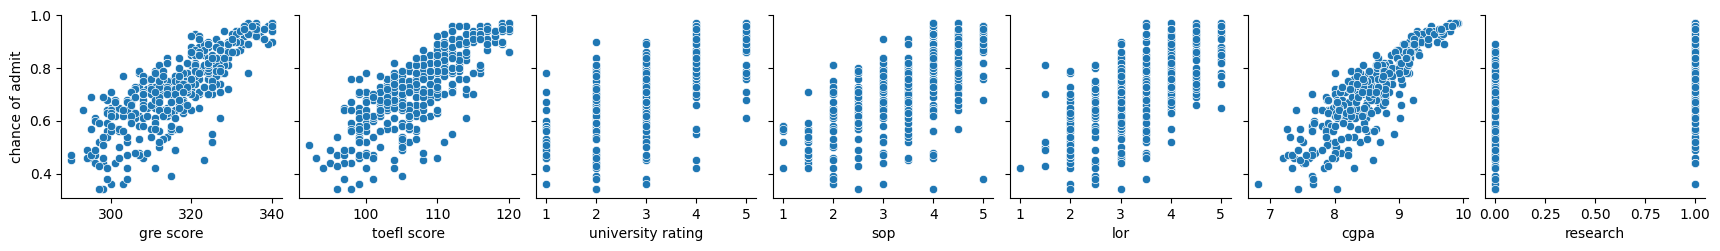

In [86]:
# Plotting all features against the target variables
sns.pairplot(df, x_vars=['gre score', 'toefl score', 'university rating',
                         'sop', 'lor', 'cgpa', 'research'], y_vars=['chance of admit'])
plt.show()

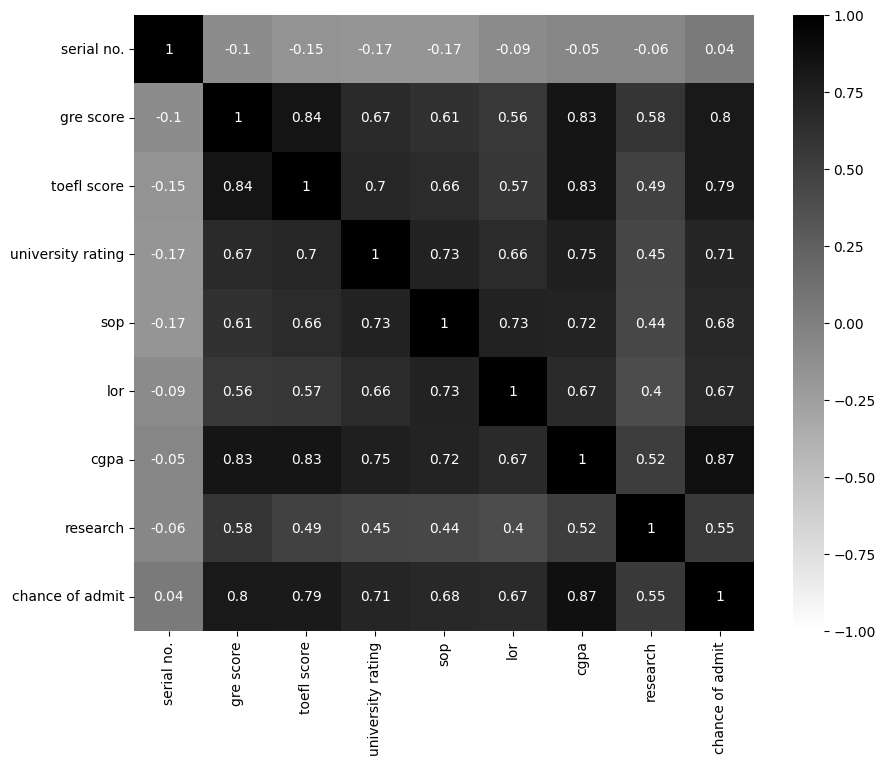

In [87]:
# Correlation between the features

plt.figure(figsize=(10,8))
correlation_matrix = df.corr().round(2)
sns.heatmap(correlation_matrix, cmap='binary', vmin=-1, vmax=1, annot=True)
plt.show()

## Correlation Matrix Info
This shows the relationship between different variables in the given Dataframe. I am currently more focused on the relationship between the target variable against the other variables. Something like serial no. is completely irrelevan as expected. I will be removing the feature. However having multiple high correlated features might issues associated with **Multicollinearity**


In [88]:
df = df.drop('serial no.', axis=1)

In [89]:
df.columns

Index(['gre score', 'toefl score', 'university rating', 'sop', 'lor', 'cgpa',
       'research', 'chance of admit'],
      dtype='object')

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [91]:
X = df.iloc[:, :-1] # Features
y = df.iloc[:, -1] # Target var

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=10)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [96]:
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)


(80, 7)
(320, 7)
(80,)
(320,)


In [99]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [100]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(r2, mae)

0.7829174032384248 0.04619885998379382


In [101]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Weight': model.coef_})
coef_df = coef_df.sort_values(by='Weight', ascending=False)
print("\nFeature Importance (Standardized Weights):")
print(coef_df)


Feature Importance (Standardized Weights):
             Feature    Weight
5               cgpa  0.053047
6           research  0.028054
0          gre score  0.021967
1        toefl score  0.018407
4                lor  0.013780
3                sop  0.009314
2  university rating  0.000619


In [106]:
result_df = X_test.copy()
result_df['y_test'] = y_test
result_df['y_pred'] = y_pred
result_df['difference'] = result_df['y_pred'] - result_df['y_test']
result_df

,gre score,toefl score,university rating,sop,lor,cgpa,research,y_test,y_pred,difference
303,323,107,3,3.5,3.5,8.55,1,0.73,0.769916,0.039916
349,313,101,3,2.5,3.0,8.04,0,0.62,0.614272,-0.005728
149,311,106,2,3.5,3.0,8.26,1,0.79,0.710153,-0.079847
100,322,107,3,3.5,3.5,8.46,1,0.71,0.760059,0.050059
175,320,111,4,4.5,3.5,8.87,1,0.85,0.814426,-0.035574
...,...,...,...,...,...,...,...,...,...,...
369,301,98,1,2.0,3.0,8.03,1,0.67,0.631840,-0.038160
320,317,106,3,4.0,3.5,8.50,1,0.75,0.755556,0.005556
15,314,105,3,3.5,2.5,8.30,0,0.54,0.653012,0.113012
125,300,100,3,2.0,3.0,8.66,1,0.64,0.692756,0.052756
